## PHYS 105A:  Introduction to Scientific Computing

# Assignment: Root Finding

In this assignment, we will modify the bisection method and use it solve for the roots of chebyshev polynomials to machine accuracy.

## Chebyshev polynomial

* The Chebyshev polynomails are special polynomails that are extremely useful in approximation theory.

* The Chebyshev polynomials of the first kind $T_{n}$ are given by:

  $T_{n}\left(\cos {\theta }\right)=\cos {(n\theta )} \Rightarrow T_{n}\left(x\right)=\cos {(n\arccos x )}$
  
* There is a recursion relationship:

  $T_{0}(x)=1$
  
  $T_{1}(x)=x$
  
  $T_{n+1}(x)=2x\,T_{n}(x)-T_{n-1}(x)$
  
* From the definition, it is easy to show its roots are:

  $x_{k}=\cos \left[{\frac{\pi (k+1/2)}{n}}\right],\quad k=0,\ldots ,n-1$

* In this assignment, we will solve the roots of the Chebyshev polynomials.

* We will also learn closures and recursion in python.

In [1]:
# Step 1. Import Libraries

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Step 2. Implement our Chebyshev polynomial

def ChebT(x, n):
    if n == 0:
        return 1 + 0*x # a hack so it work for numpy arrays
    elif n == 1:
        return x
    else:
        return 2 * x * ChebT(x, n-1) - ChebT(x, n-2)

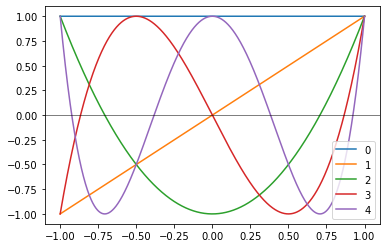

In [3]:
# Step 3. Plot our Chebyshev polynomial

x = np.linspace(-1, 1, 2001)
for n in range(5):
    plt.plot(x, ChebT(x, n), label=n)
plt.axhline(y=0, color='k', lw=0.5)
plt.legend()

In [4]:
# Step 4. Copy the bisection method from the lecture to here

def bisection(f, a, b, acc=1e-12, nmax=100):
    ________

In [ ]:
# Step 5. Test if the bisection method work

for n in [1,3,5]:
    def ChebTn(x):
        return ChebT(x, n) # This is called function closure
    
    print(bisection(ChebTn, -1, 1))

In [ ]:
# Step 6. What if we try even order Chebyshev polynomial?

for n in ________:
    def ChebTn(x):
        return ChebT(x, n) # This is called function closure
    
    print(bisection(ChebTn, -1, 1))

In [6]:
# Step 7. Hack the bisection method
#
# The idea here is, if we are unluck and f(a) and f(b) have different signs,
# we want to sub-divide the interval [a, b] into multiple intervals, 
# and evaluate f at the sub intervals.
# If f(m) has a different sign than f(a) and f(b), then we can apply bisection
# method to [a, m] or [m, b].

def nsection(f, a, b, n):
    try:
        return bisection(________)
    except ValueError:
        pass
    
    l = f(a)
    for i in range(1,n):
        m = a + (b-a)*i/n
        if l * f(m) <= 0:
            if i <= n//2:
                return bisection(________)
            else:
                return bisection(________)

    raise Exception("No root found")

In [7]:
# Step 8. Use recursion to solve for all roots

def all_roots(f, a, b, n):
    try:
        root = nsection(f, a, b, n)
    except Exception:
        return []

    # Recursion, we want to look for all possible roots
    # in the left and right segments
    l = all_roots(f, a, root-1e-12, n-1)
    r = all_roots(________)
    
    # Combine the results and return a list
    return l + [root] + r

In [8]:
# Step 9. Test the results

roots_list = []
for n in range(16):
    def ChebTn(x):
        return ChebT(x, n)

    roots = np.sort(all_roots(ChebTn, -1, 1, n))
    print(len(roots), np.around(roots, 3))

    solution = np.sort(np.cos(np.pi * (np.arange(n)+0.5)/n))
    print(abs(roots - solution))
    
    roots_list.append(roots)

0 []
[]
1 [0.]
[6.123234e-17]
2 [-0.707  0.707]
[1.20126131e-13 3.35398376e-13]
3 [-0.866  0.     0.866]
[2.28816965e-13 6.12323400e-17 2.28816965e-13]
4 [-0.924 -0.383  0.383  0.924]
[3.77475828e-14 2.07722728e-13 2.90156787e-13 4.79616347e-14]
5 [-0.951 -0.588  0.     0.588  0.951]
[3.71702669e-13 2.31481501e-13 6.12323400e-17 2.31259456e-13
 3.71702669e-13]
6 [-0.966 -0.707 -0.259  0.259  0.707  0.966]
[1.97508676e-13 2.16715534e-13 2.67674771e-13 3.61488617e-13
 2.41473508e-13 2.50688359e-13]
7 [-0.975 -0.782 -0.434  0.     0.434  0.782  0.975]
[1.08801856e-14 1.73194792e-13 3.99236200e-13 6.12323400e-17
 3.99125177e-13 1.73527859e-13 1.09912079e-14]
8 [-0.981 -0.831 -0.556 -0.195  0.195  0.556  0.831  0.981]
[1.85296223e-13 1.44551038e-13 2.73114864e-13 3.24545946e-13
 2.36477504e-14 9.13713549e-14 1.50435220e-13 1.84630089e-13]
9 [-0.985 -0.866 -0.643 -0.342  0.     0.342  0.643  0.866  0.985]
[3.81916720e-13 3.60822483e-14 1.32116540e-14 3.17690318e-13
 6.12323400e-17 1.05859765

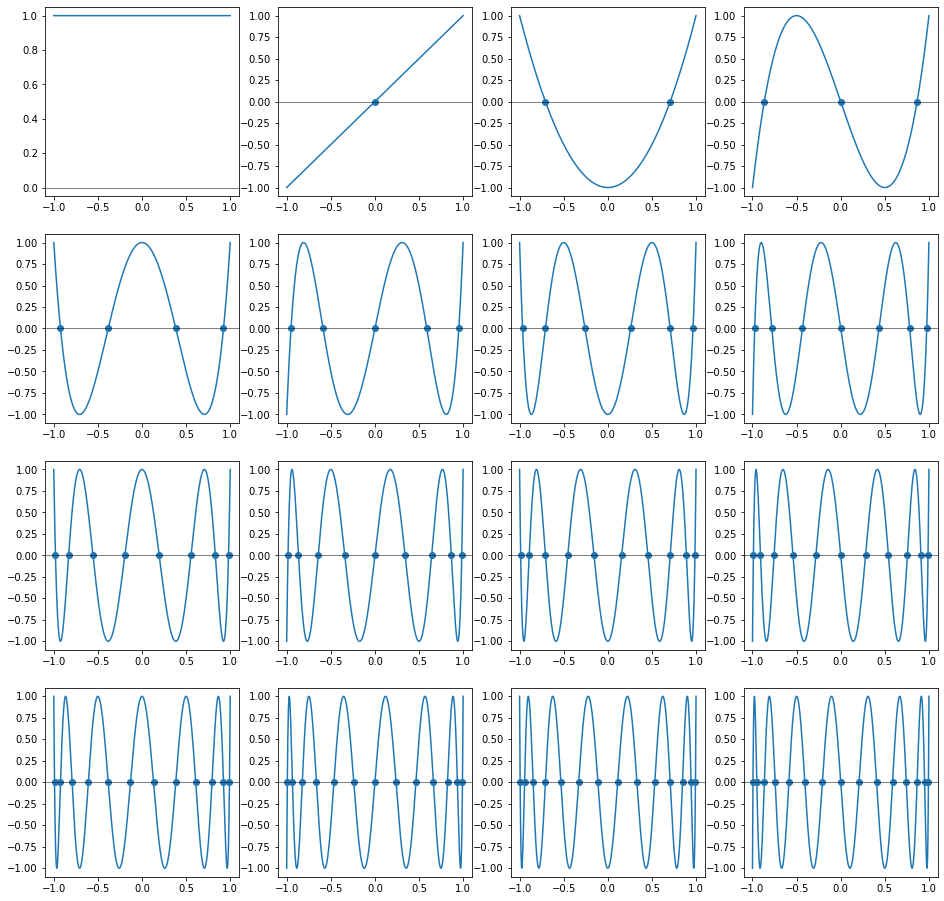

In [9]:
# Step 10. Plot the results

x = np.linspace(-1, 1, 2001)

fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i in range(4):
    for j in range(4):
        n = i * 4 + j
                
        axes[i][j].plot(x, ChebTn(x))
        axes[i][j].axhline(y=0, color='k', lw=0.5)
        
        if n != 0:
            roots = roots_list[n]
            axes[i][j].scatter(roots, ChebTn(roots))

Question: we learned in the lecture that it is difficult to find all roots of a function,
but nsection() and all_roots() seem to work fine.
Why nsection() and all_roots() work?
What's their limitation?
In what situation will things break down?

Please write your answers in this cell:

#________